In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 입니다.]

In [2]:
train = pd.read_csv('/Users/joyh1/train.csv')
test = pd.read_csv('/Users/joyh1/test.csv')

In [3]:
#####데이터 전처리 과정#####
#train과 test 데이터에서 Name과 Ticket 칼럼을 삭제! 왜? 생존여부(예측값)에 영향을 주지 않기 때문이라고 판단

train = train.drop(['Name', 'Ticket'], axis=1)
test = test.drop(['Name', 'Ticket'], axis=1)

In [4]:
# Cabin칼럼도 삭제. 왜? 너무 많은 결측치를 갖고 있기 때문
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [5]:
# Sex 칼럼의 리얼밸류값을 남성은 1로 여성은 0으로 전환
train.loc[train['Sex']=='male', 'Sex'] = 1
train.loc[train['Sex']=='female', 'Sex'] = 0
test.loc[test['Sex']=='male', 'Sex'] = 1
test.loc[test['Sex']=='female', 'Sex'] = 0

In [6]:
#위에서 보는 것처럼 Embarked 칼럼에 해당하는 결측치 값은 train데이터에 있다보니
#train 데이터에서 다른 값으로 채워줘야 한다!

train['Embarked'] = train['Embarked'].fillna('S')
#여기서 S값으로 채우는 이유는 결측치가 2개밖에 되지않고 Embarked의 리얼밸류값
#종류중에 S값이 가장 많기 때문

In [7]:
#Embarked의 리얼벨류 값 종류들을 각각 수치화 시킨다!
train.loc[train['Embarked']=='S', 'Embarked'] = 0
train.loc[train['Embarked']=='C', 'Embarked'] = 1
train.loc[train['Embarked']=='Q', 'Embarked'] = 2
test.loc[test['Embarked']=='S', 'Embarked'] = 0
test.loc[test['Embarked']=='C', 'Embarked'] = 1
test.loc[test['Embarked']=='Q', 'Embarked'] = 2

In [8]:
# test의 152번째 행의 Fare 값을 중간값으로 바꾸기
# 152번째행의 Pclass의 값과 같은 모든 행의 Fare를 중간값으로 바꾼다
test.loc[152, 'Fare'] = test.loc[test['Pclass']==test.Pclass[152], 'Fare'].median()

In [9]:
# train의 age에 대한 mean(평균값), std(표준편차), null값 총 갯수 구하기
average_age_train = train['Age'].mean()
std_age_train = train['Age'].std()
count_nan_age_train = train['Age'].isnull().sum()

In [10]:
#test의 age에 대한 mean(평균값), std(표준편차), null값 총 갯수 구하기
average_age_test = test['Age'].mean()
std_age_test = test['Age'].std()
count_nan_age_test = test['Age'].isnull().sum()

In [11]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [12]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [14]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [15]:
#두 데이터에 대한 age의 결측값이 너무나도 많기 때문에
#앞에서 구한 age의 평균,표준편차,null값합을 이용해 랜덤숫자를 선정해서 
#결측치에 할당한다!
#randint 뒤의 인자 (s ,e) 에서 s~e-1개 범위사이의 아무숫자 한개 출력임!
#### size의 의미가뭘까????

rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_age_train)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)


In [16]:
train.loc[np.isnan(train['Age']), 'Age'] = rand_1
test.loc[np.isnan(test['Age']), 'Age'] = rand_2

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [18]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


In [19]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
# train의 age 리얼벨류값 실수에서 정수형으로 바꾸기

train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,0
1,2,1,1,0,38,1,0,71.2833,1
2,3,1,3,0,26,0,0,7.9250,0
3,4,1,1,0,35,1,0,53.1000,0
4,5,0,3,1,35,0,0,8.0500,0


In [23]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34,0,0,7.8292,2
1,893,3,0,47,1,0,7.0000,0
2,894,2,1,62,0,0,9.6875,2
3,895,3,1,27,0,0,8.6625,0
4,896,3,0,22,1,1,12.2875,0


In [41]:
from keras.datasets import mnist #손글씨 읽기 가능
from keras.models import Sequential   #layer의 선형스택 

from keras.layers.core import Dense, Dropout, Activation
#Dense 레이어는 입력과 출력을 모두 연결해줍니다. 
#예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개(4*8=32) 
#각 연결선에는 가중치(weight)를 포함하고 있는데, 
#이 가중치가 나타내는 의미는 연결강도라고 보시면 됩니다. 
#현재 연결선이 32개이므로 가중치도 32개입니다.

#Dropout은 일종의 정규화이다. 과적합(overfitting)의 위험을 줄이고 학습속도 개선
#Activation은 활성화함수!

from keras.optimizers import Adadelta
#Adagrad(변수들을 업데이트할때 각 변수마다 스텝사이즈를 다르게 설정해 이동)
#자주등장,변화하는 변수는 작은크기로 vs 변화x변수는 큰 크기로
#이러한 걸 보완한 것이 Adadelta

from keras.utils import np_utils
# 원핫 인코딩!?

from keras.callbacks import Callback
#callback이란 객체가 다시 주체를 부름

# train&test 데이터 준비하기
X_train = train.drop(['PassengerId', 'Survived','Embarked'], axis=1) # 해당 칼럼 삭제
X_test = test.drop(['PassengerId','Embarked'], axis=1) #test데이터 해당칼럼 삭제
Y_train = train['Survived']


X_train = np.array(X_train).astype('float32')
Y_train = np.array(Y_train).astype('int32')
Y_train = np_utils.to_categorical(Y_train, 2) #원 핫인코딩, 뒤에숫자2는 [0,1] 이렇게 두자리 의미
X_test = np.array(X_test).astype('float32')


In [43]:
model = Sequential()    #처음에 업로드했던 것보다 scale을 줄기이 위해 히든레이어의 Dense(노드갯수)를 128 -> 32로 줄였고
                        # Dropout을 0.1 -> 0.001로 줄였다 ( 0.001 설정은 보통 이정도의 기준을 설정해야 한다고 해서)

# 첫번째 히든레이어
model.add(Dense(32, input_shape=(6, ), init='uniform')) #input_shape가 6 = 들어갈 데이터 칼럼 갯수=6개!
model.add(Activation('relu'))
model.add(Dropout(0.001))

# 두번째 히든레이어
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.001))

# 출력 층
model.add(Dense(2))
model.add(Activation('sigmoid'))

#Compile= 앞서지정한 모델이 효과적으로 구현되도록 여러가지 환경 설정
#어떤 loss function을 사용할지 설정!
model.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

# fit=모델학습시키기!
call = Callback()
print("Training...")
hist = model.fit(X_train, Y_train,
                batch_size=128, nb_epoch=3000, verbose=0,
                validation_split=0.1, callbacks=[call])



C:\Users\joyh1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_shape=(6,), kernel_initializer="uniform")`
  """


Training...


C:\Users\joyh1\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


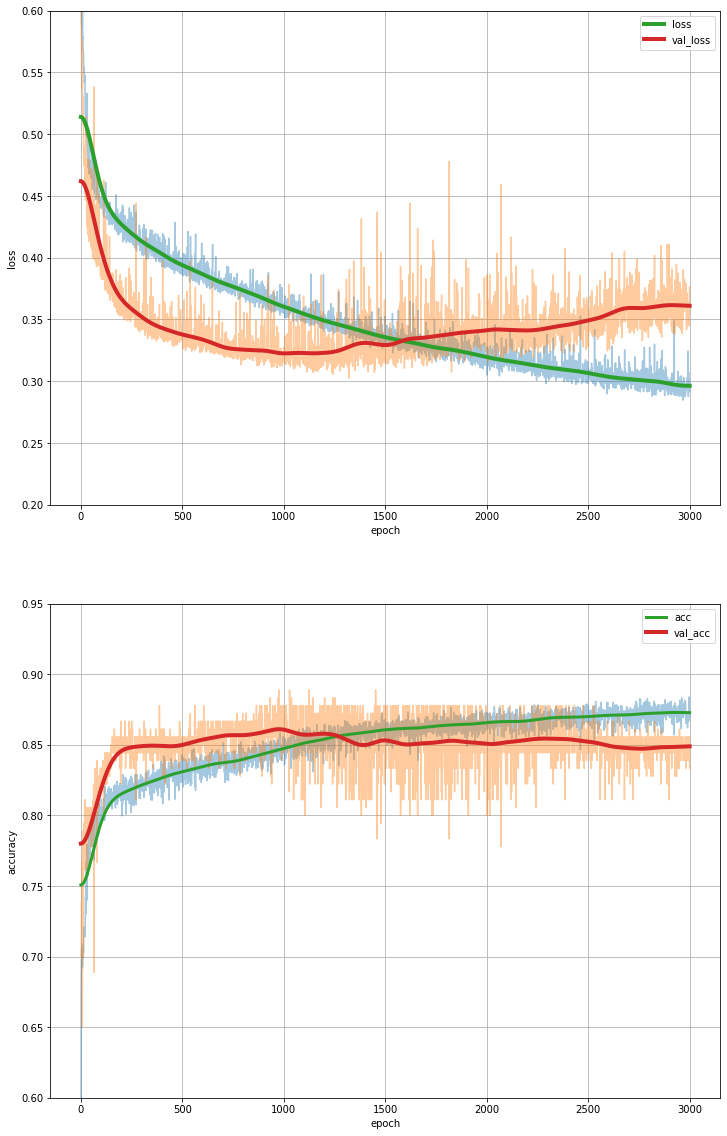

In [44]:
# plot loss&accuracy = 학습(fit)과정을 주피터노트북 상에서 그래프로 보여주는 패키지
# epoch = 전체 데이터 셋에 대해 한 번 학습을 완료한 상태
# batch size = 나눠진 데이터 set
# iteration = epoch를 나누어서 실행하는 횟수

loss = hist.history['loss']  #.history : 학습이력 
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
#loss=훈련 손실값 / acc=훈련 정확도 / val_loss=검증 손실값/ val_acc=검증정확도

from scipy.ndimage.filters import gaussian_filter as gf
#가우시안필터는 mean필터와 다르게 중심에 더많은 가중치를 주고 거리가 멀어질수록 가중치가 감소
fit_loss = gf(loss, sigma=50)  #시그마가 커질수록 더 넓게분포..
fit_val_loss = gf(val_loss, sigma=50)
fit_acc = gf(acc, sigma=50)
fit_val_acc = gf(val_acc, sigma=50)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))
nb_epoch = len(loss)

ax[0].plot(range(nb_epoch), loss, alpha=0.4)
ax[0].plot(range(nb_epoch), val_loss, alpha=0.4)
ax[0].plot(range(nb_epoch), fit_loss, label='loss', linewidth=4)
ax[0].plot(range(nb_epoch), fit_val_loss, label='val_loss', linewidth=4)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_ylim([0.2, 0.6])
ax[0].legend()
ax[0].grid()

ax[1].plot(range(nb_epoch), acc, alpha=0.4)
ax[1].plot(range(nb_epoch), val_acc, alpha=0.4)
ax[1].plot(range(nb_epoch), fit_acc, label='acc', linewidth=3)
ax[1].plot(range(nb_epoch), fit_val_acc, label='val_acc', linewidth=4)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].set_ylim([0.6, 0.95])
ax[1].legend()
ax[1].grid()


plt.show()
                       # val_loss가 특정 epoch횟수 지난후 증가할 때= 과적합 발생
#여기서, 과적합은 학습 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상이다. 
#과적합에 대한 대표적인 예는 노랑색 고양이를 보며 고양이의 특성을 학습한 기계가 검은색이나 다른 색깔의 고양이를 구분하지 못하는 것과 비슷하다고 생각하면 된다.